# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN




from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



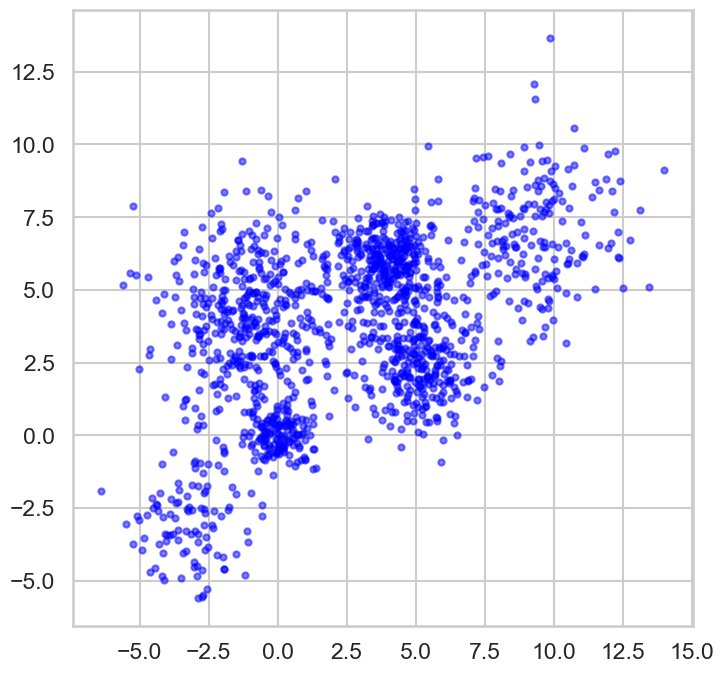

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [107]:
K =range(1,10)
kmeans_labels_df = pd.DataFrame()

for i in K:
    kmeans = KMeans(n_clusters= i, random_state=0, n_init=10).fit(Multi_blob_Data)
    label = kmeans.labels_
    kmeans_labels_df [ f'k={i}'] = label.tolist()

    
df = pd.DataFrame(Multi_blob_Data, columns=['col_1' , 'col_2'])
print(kmeans_labels_df)



      k=1  k=2  k=3  k=4  k=5  k=6  k=7  k=8  k=9
0       0    0    1    3    3    0    3    4    7
1       0    0    1    3    3    0    3    4    7
2       0    0    1    3    3    0    3    4    7
3       0    0    1    3    3    0    3    4    8
4       0    0    1    3    3    0    3    4    7
...   ...  ...  ...  ...  ...  ...  ...  ...  ...
1445    0    1    0    1    2    3    1    7    6
1446    0    1    0    1    2    3    1    2    2
1447    0    1    0    1    2    3    1    2    2
1448    0    1    0    1    4    1    2    6    2
1449    0    1    0    1    2    3    1    2    2

[1450 rows x 9 columns]


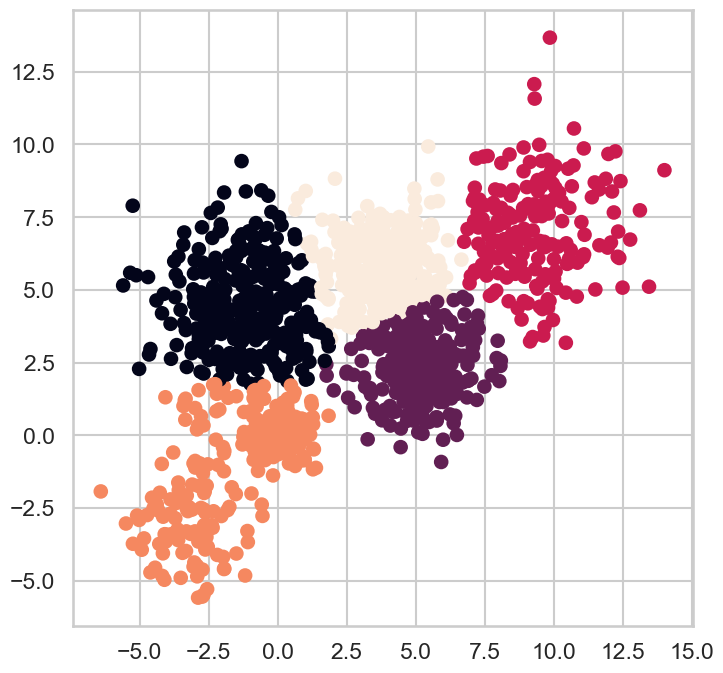

In [109]:

plt.scatter(df['col_1'] , df['col_2'] , c = kmeans_labels_df['k=5'])
plt.show()

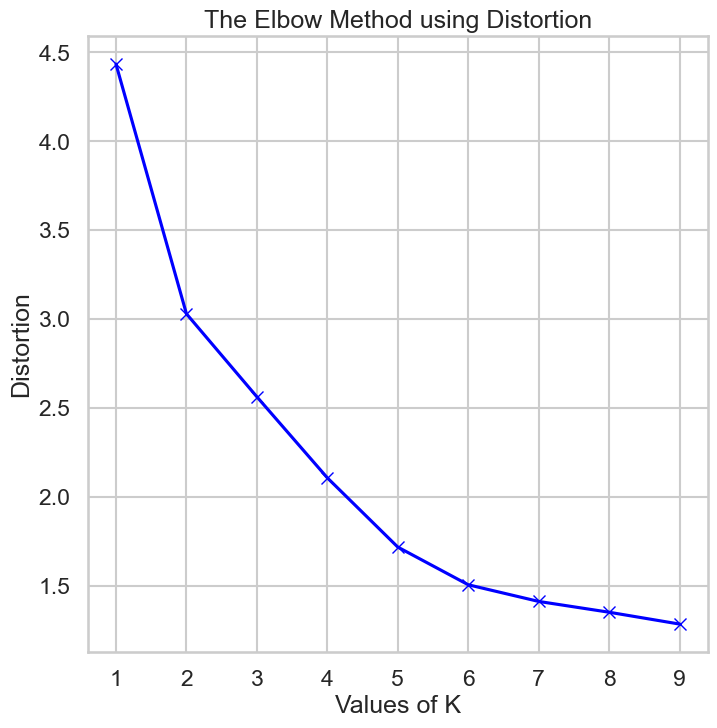

In [6]:
distortions=[]
mapping1 ={}
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(Multi_blob_Data)
    kmeanModel.fit(Multi_blob_Data)
  
    distortions.append(sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / Multi_blob_Data.shape[0])
    mapping1[k] = sum(np.min(cdist(Multi_blob_Data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / Multi_blob_Data.shape[0]
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()    

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [94]:
data_frame_of_labels = pd.DataFrame()
affinities = ['euclidean', 'cosine' ,'manhattan' ]


linkages = ['average','single' ]


for i in affinities :
    for j in linkages :
        hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=5 )
        labels2 = hierarchical_cluster.fit_predict(Multi_blob_Data)
        #print(len(labels2))
        data_frame_of_labels [f'{i}_{j}'] = labels2.tolist()
data_frame_of_labels
        



,euclidean_average,euclidean_single,cosine_average,cosine_single,manhattan_average,manhattan_single
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1445,1,0,0,0,8,0
1446,1,0,0,0,8,0
1447,4,0,0,0,2,0
1448,1,0,0,0,4,0


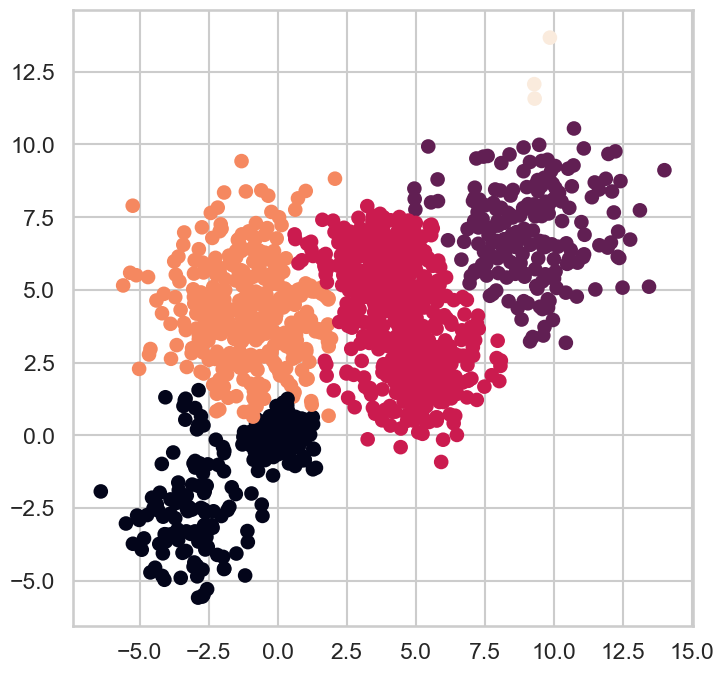

In [95]:

plt.scatter(df['col_1'], df['col_2'], c=data_frame_of_labels.euclidean_average)
plt.show()

In [98]:
linkage_data_frame = pd.DataFrame ()

for i in affinities :
    for j in linkages :
        if i != 'manhattan':
            
            linkage_data = linkage(Multi_blob_Data, method= j, metric= i)
            #hierarchical_cluster = AgglomerativeClustering(n_clusters= None, affinity=  i , linkage=  j , distance_threshold=5 )
            #labels2 = hierarchical_cluster.fit_predict(Multi_blob_Data)
            #print(len(labels2))
            linkage_data_frame[f'{i}_{j}'] = linkage_data.tolist()
linkage_data_frame



,euclidean_average,euclidean_single,cosine_average,cosine_single
0,"[252.0, 508.0, 0.003997275648338728, 2.0]","[252.0, 508.0, 0.003997275648338728, 2.0]","[419.0, 443.0, 2.4236168627567167e-13, 2.0]","[419.0, 443.0, 2.4236168627567167e-13, 2.0]"
1,"[277.0, 290.0, 0.004231313944163474, 2.0]","[277.0, 290.0, 0.004231313944163474, 2.0]","[952.0, 1190.0, 4.0811798385220754e-13, 2.0]","[952.0, 1190.0, 4.0811798385220754e-13, 2.0]"
2,"[563.0, 808.0, 0.007836332239936272, 2.0]","[563.0, 808.0, 0.007836332239936272, 2.0]","[1191.0, 1372.0, 6.962541654331744e-12, 2.0]","[1191.0, 1372.0, 6.962541654331744e-12, 2.0]"
3,"[1024.0, 1086.0, 0.007873878315625365, 2.0]","[1024.0, 1086.0, 0.007873878315625365, 2.0]","[186.0, 299.0, 8.059775069568786e-12, 2.0]","[186.0, 299.0, 8.059775069568786e-12, 2.0]"
4,"[1065.0, 1098.0, 0.011337535523517423, 2.0]","[1065.0, 1098.0, 0.011337535523517423, 2.0]","[586.0, 718.0, 2.0992652061124772e-11, 2.0]","[586.0, 718.0, 2.0992652061124772e-11, 2.0]"
...,...,...,...,...
1444,"[2887.0, 2889.0, 4.470515022769732, 258.0]","[37.0, 2893.0, 1.4306939998763193, 1445.0]","[2887.0, 2891.0, 0.2540161336634578, 356.0]","[2829.0, 2881.0, 0.0028703498761725177, 10.0]"
1445,"[2862.0, 2893.0, 5.761961049795259, 196.0]","[2819.0, 2894.0, 1.5970037391177905, 1447.0]","[2884.0, 2889.0, 0.3293001269468198, 40.0]","[2888.0, 2893.0, 0.005166968877898026, 1422.0]"
1446,"[2892.0, 2894.0, 5.819682969480273, 625.0]","[1253.0, 2895.0, 1.6363035822155292, 1448.0]","[2893.0, 2894.0, 0.7041576371000081, 1278.0]","[2878.0, 2894.0, 0.006855563890491578, 16.0]"
1447,"[2891.0, 2895.0, 6.140563461698496, 825.0]","[1447.0, 2896.0, 1.6969100201376701, 1449.0]","[2892.0, 2895.0, 0.8676351851493943, 172.0]","[2892.0, 2895.0, 0.009926637355843981, 1434.0]"


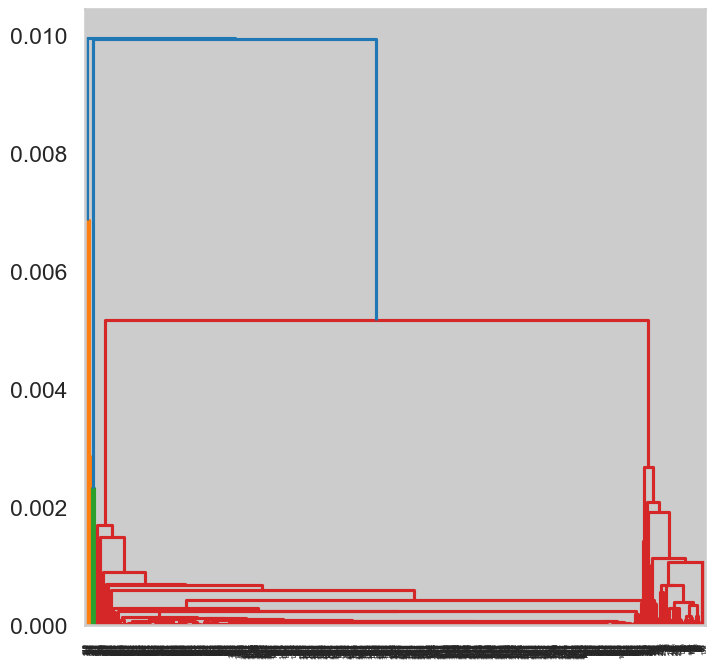

In [97]:
dendrogram(linkage_data)
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

<function matplotlib.pyplot.show(close=None, block=None)>

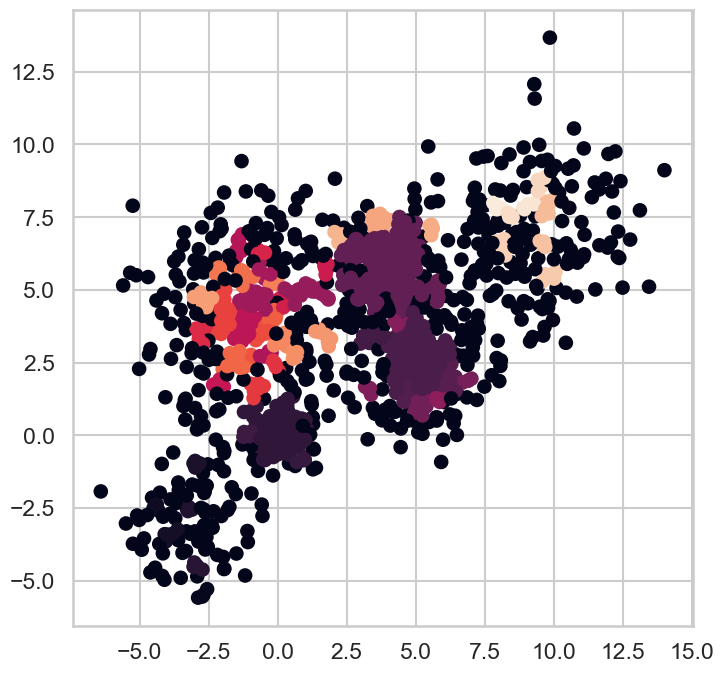

In [31]:
epsilon = 0.25
min_samples =4
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Multi_blob_Data)
labels3 = db.labels_
plt.scatter(df['col_1'], df['col_2'], c=labels3)
plt.show

In [110]:
eps_list = np.arange(start=0.1, stop=0.2, step=3)
min_sample_list=np.arange(start=5, stop=25, step=1)
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(Multi_blob_Data))) > 5 ):
            sil_score=silhouette_score(Multi_blob_Data, db.fit_predict(Multi_blob_Data))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,-0.542335,eps:0.1 min_sample :5


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 